In [ ]:
!pip install networkx
!pip install matplotlib

**Поиск в глубину с использованием networkx**

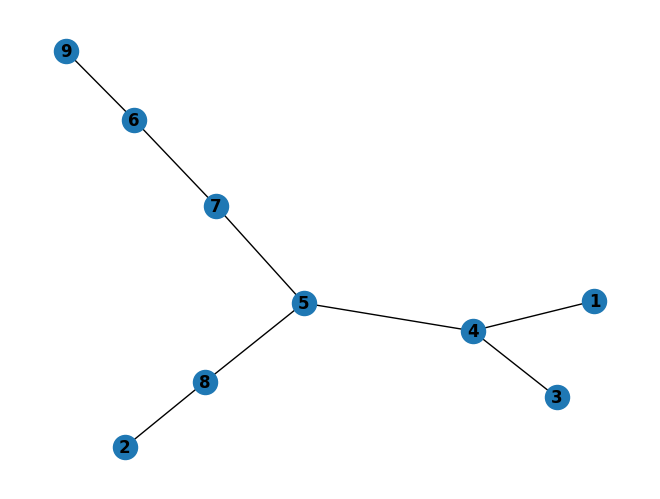

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()  # создаём граф
G.add_node(1)  # добавим 1 узел
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_nodes_from([6, 7, 8, 9])  # добавить несколько узлов

# добавляем ребра
G.add_edge(5, 8)
G.add_edge(5, 4)
G.add_edge(5, 7)
G.add_edge(8, 2)
G.add_edge(4, 3)
G.add_edge(4, 1)
G.add_edge(7, 6)
G.add_edge(6, 9)

nx.draw(G, with_labels=True, font_weight='bold') #визуализация
plt.show()


**Обход графа в networkx — DFS**
'networkx' предлагает ряд методов обхода графа различными способами. Мы будем использовать метод dfs_preorder_nodes() для анализа графа в порядке поиска в глубину.

In [ ]:

dfs_output = list(nx.dfs_preorder_nodes(G, source=5))
print(dfs_output)

[5, 8, 2, 4, 3, 1, 7, 6, 9]


In [ ]:
dag = nx.digraph.DiGraph()
dag.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])
dag.add_edges_from([('A', 'B'), ('A', 'E'), ('B', 'D'), ('E', 'C'),
                      ('D', 'G'),('C', 'G'),('C', 'I'), ('F', 'I')])
def dfs(dag, start, visited, stack):
       if start in visited:
           # node and all its branches have been visited
           return stack, visited
       if dag.out_degree(start) == 0:
           # if leaf node, push and backtrack
           stack.append(start)
           visited.append(start)
           return stack, visited
       #traverse all the branches
       for node in dag.neighbors(start):
           if node in visited:
               continue
           stack, visited = dfs(dag, node, visited, stack)
       #now, push the node if not already visited
       if start not in visited:
           print("pushing %s"%start)
           stack.append(start)
           visited.append(start)
       return stack, visited
def topological_sort_using_dfs(dag):
  visited = []
  stack=[]
  start_nodes = [i for i in dag.nodes if dag.in_degree(i)==0]
  for s in start_nodes:
    stack, visited = dfs(dag, s, visited, stack)
    print("Topological sorted:")
    while(len(stack)!=0):
      print(stack.pop(), end=" ")
topological_sort_using_dfs(dag)

pushing D
pushing B
pushing C
pushing E
pushing A
Topological sorted:
A E C I B D G pushing F
Topological sorted:
F Topological sorted:
H 

In [ ]:
topological_sorting = nx.topological_sort(dag)
for n in topological_sorting:
    print(n, end=' ')

A F H B E D C G I 

In [ ]:
graph = nx.Graph()
graph.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])
graph.add_edges_from([('A', 'B'), ('B', 'E'), ('A', 'E')]) #component 1
graph.add_edges_from([('C', 'D'), ('D', 'H'), ('H', 'F'), ('F', 'C')]) #component 2
graph.add_edge('G','I') #component 3

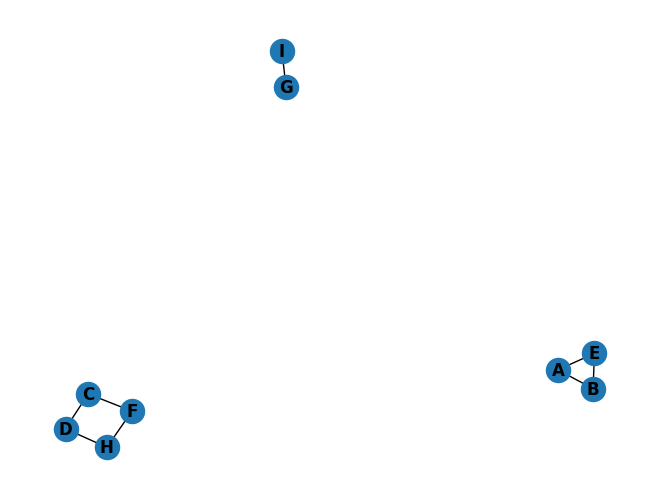

In [ ]:
import matplotlib.pyplot as plt
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()

<function find_connected_components at 0x7fd5f151c4c0>


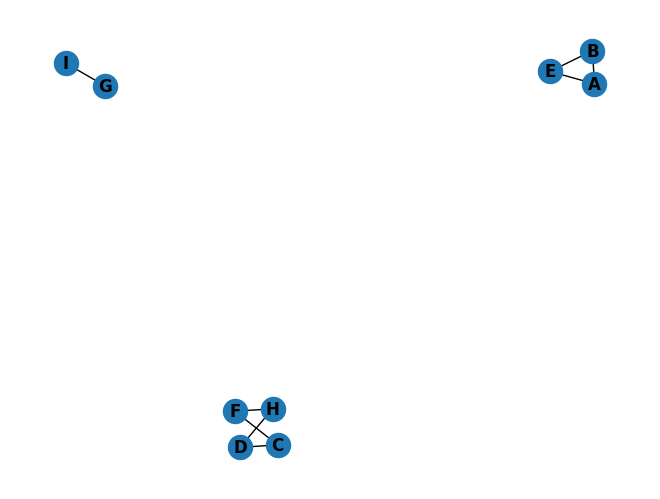

In [ ]:
from matplotlib import path
def find_connected_components(graph):
       visited = []
       connected_components = []
       for node in graph.nodes:
           if node not in visited:
               cc = [] #connected component
               visited, cc = dfs_traversal(graph, node, visited, cc)
               connected_components.append(cc)
       return connected_components
def dfs_traversal(graph, start, visited, path):
  if start in visited:
    return visited, path
    visited.append(start)
    path.append(start)
    for node in graph.neighbors(start):
      visited, path = dfs_traversal(graph, node, visited, path)
      return visited, path
  connected_components = find_connected_components(graph)
  print("Total number of connected components =", len(connected_components))
  for cc in connected_components:
    print(cc)
nx.draw(graph, with_labels=True, font_weight='bold')
print(find_connected_components)
plt.show()